# Football Data from Transfermarkt
- Kaggle Data URL

    - https://www.kaggle.com/datasets/davidcariboo/player-scores

## 데이터 설명
- Transfermarkt 웹사이트에서 스크레이핑한 각종 축구 데이터 (매주 한번 파일 업데이트)
    - 주요 대회 시즌별 60,000개 이상의 경기
    - 모든 대회의 400개 이상의 클럽들
    - 30,000 이상의 선수들
    - 400,000개 이상의 선수 가치 기록
    - 1,200,000개 이상의 선수 출전 기록

- `csv` 파일 설명
    - `apperances` : 선수 출장 기록
    - `club_games` : 클럽별 경기 홈팀, 어웨이팀 정보
    - `clubs` : 리그별 속해 있는 클럽
    - `competitions` : 대회 정보
    - `game_events` : 경기별 이벤트 정보 (카드, 득점, 어시스트 등)
    - `game_lineups` : 경기별 선수의 선발, 교체 명단 등재 여부
    - `games` : 경기에 대한 정보 (시즌, 라운드, 홈팀, 어웨이팀, 순위)
    - `player_valuations` : Transfermarkt 웹사이트에서 매긴 선수의 가치
    - `players` : 선수에 대한 세부 정보

- 데이터베이스 스키마
    <img src="https://raw.githubusercontent.com/dcaribou/transfermarkt-datasets/master/resources/diagram.svg?sanitize=true" width="1700">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import timedelta
import missingno as msno

In [2]:
# 데이터 경로 지정
# C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data
apps_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/appearances.csv"
club_games_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/club_games.csv"
clubs_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/clubs.csv"
competitions_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/competitions.csv"
game_events_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/game_events.csv"
game_lineups_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/game_lineups.csv"
games_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/games.csv"
player_valuations_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/player_valuations.csv"
players_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/players.csv"

# 데이터셋 불러오기
apps_df = pd.read_csv(apps_path)
club_games_df = pd.read_csv(club_games_path)
clubs_df = pd.read_csv(clubs_path)
competitions_df = pd.read_csv(competitions_path)
game_events_df = pd.read_csv(game_events_path)
game_lineups_df = pd.read_csv(game_lineups_path)
games_df = pd.read_csv(games_path)
player_valuations_df = pd.read_csv(player_valuations_path)
players_df = pd.read_csv(players_path)

In [3]:
apps_df.head(3)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45


In [4]:
club_games_df.head(3)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0


In [5]:
clubs_df.tail(3)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,26.6,17,68.0,16,Gewiss Stadium,21747,+€73.82m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,29,25.7,17,58.6,3,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...
425,984,west-bromwich-albion,West Bromwich Albion,GB1,NaN,25,27.8,8,32.0,4,The Hawthorns,26850,€-1.35m,NaN,2020,../data/raw/transfermarkt-scraper/2020/clubs.j...,https://www.transfermarkt.co.uk/west-bromwich-...


In [6]:
competitions_df.head(3)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False


In [7]:
game_events_df.head(3)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0


In [8]:
game_lineups_df.head(3)

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0


In [9]:
games_df.head(3)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league


In [10]:
player_valuations_df.head(3)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1


In [11]:
players_df.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0


### `.info()` 확인

In [12]:
# df.info() 확인

dfs = [apps_df, club_games_df, clubs_df, competitions_df, game_events_df, game_lineups_df, 
       games_df, player_valuations_df, players_df]

for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556969 entries, 0 to 1556968
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1556969 non-null  object
 1   game_id                 1556969 non-null  int64 
 2   player_id               1556969 non-null  int64 
 3   player_club_id          1556969 non-null  int64 
 4   player_current_club_id  1556969 non-null  int64 
 5   date                    1556969 non-null  object
 6   player_name             1556963 non-null  object
 7   competition_id          1556969 non-null  object
 8   yellow_cards            1556969 non-null  int64 
 9   red_cards               1556969 non-null  int64 
 10  goals                   1556969 non-null  int64 
 11  assists                 1556969 non-null  int64 
 12  minutes_played          1556969 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 154.4+ MB
None
<class 'pandas.core.

In [13]:
apps_copy = apps_df.copy()

### 사용 데이터셋
- 목표 : 선수의 시즌별 스탯 확인
    - `apperances` : 선수 출장 기록
    - `competitions` : 대회 정보
    - `players` : 선수에 대한 세부 정보
    
- 해볼 수 있는 것
    - 선수 스탯 예측
    - 선수 몸값 예측

In [14]:
apps_df.describe(include="all")

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1556969,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1556969,1556963,1556969,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06
unique,1556969,NaN,NaN,NaN,NaN,3441,23514,43,NaN,NaN,NaN,NaN,NaN
top,2231978_38004,NaN,NaN,NaN,NaN,2020-10-04,Danilo,IT1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,1795,1068,128302,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.053405e+06,1.871580e+05,2.972905e+03,3.644765e+03,NaN,NaN,NaN,1.485527e-01,3.808682e-03,9.625818e-02,7.582617e-02,6.954007e+01
std,NaN,5.819140e+05,1.717904e+05,7.552927e+03,9.295801e+03,NaN,NaN,NaN,3.669707e-01,6.159690e-02,3.316278e-01,2.863269e-01,2.980917e+01
min,NaN,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,NaN,2.561228e+06,5.551200e+04,2.890000e+02,3.360000e+02,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01
50%,NaN,3.012051e+06,1.311020e+05,8.330000e+02,9.310000e+02,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,NaN,3.522888e+06,2.728550e+05,2.441000e+03,2.687000e+03,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01


In [15]:
competitions_df.describe(include="all")

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
count,43,43,43,43,43,43.000000,36,36,43,43,43
unique,43,42,42,11,4,NaN,14,14,1,43,2
top,CIT,premier-liga,premier-liga,first_tier,domestic_league,NaN,England,GB1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
freq,1,2,2,14,14,NaN,4,4,43,1,38
mean,NaN,NaN,NaN,NaN,NaN,97.093023,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,69.766896,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,39.500000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,157.000000,NaN,NaN,NaN,NaN,NaN


In [16]:
players_df.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.049900e+04,30499.000000,30499.000000,28452.000000,2.937800e+04,2.937800e+04
mean,3.143940e+05,2018.790190,4406.088626,182.252425,1.595829e+06,3.676898e+06
std,2.532981e+05,3.650094,10126.393427,6.838479,6.210858e+06,9.541920e+06
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.598500e+04,2016.000000,403.000000,178.000000,1.000000e+05,2.750000e+05
50%,2.591500e+05,2020.000000,1075.000000,182.000000,2.500000e+05,8.000000e+05
75%,4.706015e+05,2022.000000,3057.000000,187.000000,6.500000e+05,3.000000e+06
max,1.240762e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


In [17]:
players_df.describe(include="object")

,first_name,last_name,name,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
count,28512,30499,30499,30499,27779,28302,29920,30454,30325,30499,28134,19063,15128,30499,30499,30499,30499
unique,6602,22454,29852,29815,184,8230,182,8938,13,5,3,99,2674,24951,30499,14,424
top,David,García,Paulinho,paulinho,France,London,Spain,1996-01-19,Centre-Back,Defender,right,2024-06-30 00:00:00,Wasserman,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,TR1,Kilmarnock Football Club
freq,202,61,12,12,2187,435,1813,20,5358,9705,19736,5125,436,5549,1,3004,181


#### 사용 데이터셋 병합 함수 생성

In [18]:
# appearance_df, competitions_df, players_df, player_valuations_df merge 
# → 19-20 ~ 23-24 시즌 유럽 6대리그 데이터만 남김 (5시즌)
def app_comp_player_merge(apps_copy, competitions_df, players_df, player_valuations_df):
    # 데이터프레임의 date 컬럼 타입 datetime으로 변경
    apps_copy["date"] = pd.to_datetime(apps_copy["date"])
    player_valuations_df["date"] = pd.to_datetime(player_valuations_df["date"])
    
    # apps_copy와 competition_df competition_id를 기준으로 left join
    app_comp_df = pd.merge(apps_copy, competitions_df, how="left", on="competition_id")
    
    # 19-20 ~ 23-24 시즌 데이터만 남김 (5시즌)
    app_comp_df = app_comp_df[app_comp_df["date"]>="2019-06"]

    app_comp_player_df = pd.merge(app_comp_df, players_df, how="left", on="player_id")

    # 유럽 6대리그 (잉글랜드, 스페인, 이탈리아, 독일, 프랑스, 포르투갈 1부리그)만 필터링
    league_cond = ((app_comp_player_df.competition_id=="GB1") | (app_comp_player_df.competition_id=="ES1") | 
                   (app_comp_player_df.competition_id=="IT1") | (app_comp_player_df.competition_id=="L1") |
                   (app_comp_player_df.competition_id=="FR1") | (app_comp_player_df.competition_id=="PO1"))

    app_comp_player_df = app_comp_player_df[league_cond].reset_index(drop=True)

    # last_season 제대로 반영되지 않은 것들 발견하여, 새로 변경해준다
    # 8월 (코로나 시즌 7월까지 진행) 을 넘지 않으면 직전 시즌 연도로 변경
    app_comp_player_df["last_season"] = app_comp_player_df["date"].apply(lambda x : x.year if x.month>=8 else x.year-1)
    player_valuations_df["last_season"] = player_valuations_df["date"].apply(lambda x : x.year if x.month>=8 else x.year-1)

    # 수치형 변수 column 리스트
    num_cols = ["player_name", "last_season", "player_club_id", "yellow_cards", "red_cards","goals", "assists", "minutes_played"]

    # groupby 할 때 .agg() 적용 쉽게 하기 위하여 dict로 타입 변경
    num_cols_dict = dict.fromkeys(num_cols[3:], "sum")
    # 위에서 만든 딕셔너리에 last_season : count 넣어준다
    num_cols_dict["last_season"] = "count"
    
    # groupby를 통해, 이름, 연도 기준으로 수치형 변수 합산 → 시즌별 기록 파악하기 위함
    # last_season 컬럼은 count 한다 → 연도별 출장 횟수 카운팅하기 위함

    grouped = app_comp_player_df[num_cols].groupby(["player_name", "last_season", "player_club_id"])
    df_grouped = grouped.agg(num_cols_dict)
    df_grouped = df_grouped.rename(columns={"last_season":"total_apps"})
    df_grouped.reset_index(inplace=True)

    # player_name, last_season, player_club_id을 기준으로 merge 위해, 동일한 연도에 여러 게임으로 나뉘어 나오는 컬럼 제거
    not_merged_cols = num_cols[3:] + ["appearance_id", "game_id", "date", "url_x", "image_url", "url_y"]
    df_not_grouped = app_comp_player_df.loc[:, ~app_comp_player_df.columns.isin(not_merged_cols)].drop_duplicates()

    # 위에서 만든 df_grouped, df_not_grouped merge
    df_merged = pd.merge(df_grouped, df_not_grouped, how="left", on=["player_name", "last_season", "player_club_id"])

    # 시즌별 선수 몸값 계산 위해, player_valuations_df 파일 전처리
    player_val_grouped = player_valuations_df.groupby(["player_id", "last_season"])
    # 각 시즌별 마지막 몸값만 계산하여, market_value_per_season에 선언
    player_valuations_df["market_value_per_season"] = player_val_grouped["market_value_in_eur"].transform("last")
    pv_grouped = player_valuations_df.groupby(["player_id", 
                                               "last_season", 
                                               "market_value_per_season"]).count().reset_index()
    
    df_merged = pd.merge(df_merged, pv_grouped[["player_id", "last_season", "market_value_per_season"]], 
                         how="left", on=["player_id", "last_season"])

    
    # return df_grouped
    return df_merged

In [19]:
df_merged = app_comp_player_merge(apps_copy, competitions_df, players_df, player_valuations_df)
df_merged.head(3)

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,...,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
0,Aaron Connolly,2019,1237,0,0,3,2,1261,24,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,4000000.0
1,Aaron Connolly,2020,1237,0,0,2,1,791,17,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,7000000.0
2,Aaron Connolly,2021,1237,0,0,0,0,155,4,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,6000000.0


In [20]:
df_merged[df_merged.player_name=="Bryan Gil"]

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,...,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
2237,Bryan Gil,2019,368,2,0,0,0,63,2,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,9000000.0
2238,Bryan Gil,2019,1244,2,0,1,0,553,12,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,9000000.0
2239,Bryan Gil,2020,368,0,0,0,0,12,1,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,30000000.0
2240,Bryan Gil,2020,1533,6,0,4,3,2271,28,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,30000000.0
2241,Bryan Gil,2021,148,0,0,0,0,87,9,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,18000000.0
2242,Bryan Gil,2021,1049,3,0,0,1,740,12,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,18000000.0
2243,Bryan Gil,2022,148,1,0,0,1,148,4,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,15000000.0
2244,Bryan Gil,2022,368,4,0,2,2,922,17,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,15000000.0
2245,Bryan Gil,2023,148,0,0,0,0,189,10,537382,...,Attack,left,175.0,2026-06-30 00:00:00,IFM,GB1,Tottenham Hotspur Football Club,16000000.0,30000000.0,16000000.0


In [21]:
df_merged.shape

(16277, 41)

In [22]:
df_merged

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,...,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
0,Aaron Connolly,2019,1237,0,0,3,2,1261,24,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,4000000.0
1,Aaron Connolly,2020,1237,0,0,2,1,791,17,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,7000000.0
2,Aaron Connolly,2021,1237,0,0,0,0,155,4,434207,...,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton and Hove Albion Football Club,3500000.0,7000000.0,6000000.0
3,Aaron Cresswell,2019,379,7,0,3,0,2730,31,92571,...,Defender,left,170.0,2024-06-30 00:00:00,Unique Sports Group,GB1,West Ham United Football Club,900000.0,12000000.0,6500000.0
4,Aaron Cresswell,2020,379,3,0,0,8,3172,36,92571,...,Defender,left,170.0,2024-06-30 00:00:00,Unique Sports Group,GB1,West Ham United Football Club,900000.0,12000000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16272,İlkay Gündoğan,2019,281,7,0,2,1,2017,31,53622,...,Midfield,right,180.0,2025-06-30 00:00:00,KIN Partners,ES1,Futbol Club Barcelona,16000000.0,50000000.0,40000000.0
16273,İlkay Gündoğan,2020,281,1,0,13,3,2031,28,53622,...,Midfield,right,180.0,2025-06-30 00:00:00,KIN Partners,ES1,Futbol Club Barcelona,16000000.0,50000000.0,40000000.0
16274,İlkay Gündoğan,2021,281,1,0,8,3,1855,27,53622,...,Midfield,right,180.0,2025-06-30 00:00:00,KIN Partners,ES1,Futbol Club Barcelona,16000000.0,50000000.0,25000000.0
16275,İlkay Gündoğan,2022,281,0,0,8,5,2359,31,53622,...,Midfield,right,180.0,2025-06-30 00:00:00,KIN Partners,ES1,Futbol Club Barcelona,16000000.0,50000000.0,20000000.0


In [23]:
df_merged.to_csv("data/df_merged.csv", index=False)

In [24]:
df_merged.columns

Index(['player_name', 'last_season', 'player_club_id', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'total_apps',
       'player_id', 'player_current_club_id', 'competition_id',
       'competition_code', 'name_x', 'sub_type', 'type', 'country_id',
       'country_name', 'domestic_league_code', 'confederation',
       'is_major_national_league', 'first_name', 'last_name', 'name_y',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'market_value_per_season'],
      dtype='object')

## 결측치 처리

### 결측치 설명
- `완전 무작위 결측 (MCAR : Missing Completely At Random)`

    - 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우 완전 무작위 결측이라고 부른다.<br>
    대부분의 결측치 처리 패키지가 MCAR을 가정으로 하고 있고 보통 우리가 생각하는 결측치라고 생각하면 된다.   
    예를 들어, 데이터를 깜박하고 입력 안하거나 전산오류로 누락된 경우이다.   
    이러한 결측치는 보통 제거하거나 데이터 셋에서 단순 무작위 표본추출을 통해 완벽한 데이터셋으로 만들 수 있다.<br>

- `무작위 결측 (MAR : Missing At Random)`

    - 결측값이 결측된 변수와는 관련이 없지만 다른변수와는 관련이 있는 경우 무작위 결측이라고 부른다.  
    예를 들어, 여성이 남성보다 체중을 기입하지 않는다. 라고 하면 체중에 결측값이 생기지만,  
    이는 체중 변수와 관련이 있는 것이 아닌 성별 변수와 관련이 있다. 
<br>

- `비 무작위 결측 (MNAR : Missing Not At Random)`

    - 위 두가지 유형이 아닌 경우 MNAR이라고 하고, 결측값이 결측된 변수와 관련이 있는 경우 비 무작위 결측이라고 한다.  
    예를 들어, 서비스에 불만족한 고객들은 만족도 설문에 응답하지 않는다.  
    
- 링크 : https://syj9700.tistory.com/10

### 결측치 구분 예시
- 구분 예시
    * 3번 상태 (MNAR)가 아니라면, 이 결측값 발생이 어느정도 독립적으로 발생하지 않았을까? 라고 생각 가능한 상태가 되고,
    이는 완벽하게 우연히 발생했다면 1번 완전 무작위 결측이 된다 (MCAR)

    * 즉, 결측값의 발생에 뚜렷한 어떤 인과 관계가 숨어있는지 여부로 구분지으면 된다 
        

    * `MCAR(Missing Completely At Random)`
        
        + 특정 column(c_k)의 결측 여부가 완전히 random으로 발생하는 경우,  

        + 즉 c_k가 다른 c_1, c_2, ...와는 관련이 없을 때를 가리킴


    * `MAR(Missing At Random)  `


        + 특정 c_k의 결측 여부가 다른 c_1, c_2, ... 중 몇몇과 관련이 있는 경우  

        + 예를 들면, 소득수준(=c_1)에 따라 학업성취도(=c_k)의 결측 여부가 관련이 있을 경우
        

    * `MNAR(Missing Not At Random, non ignorable)`  

        + 특정 c_k의 결측 여부가 c_k의 값과 관련이 있는 경우  
        
        + 예를 들면, 학업성취도가 낮은 학생들이 학업성취도에 응답하지 않는 경우   
        
        + 우울증이 너무 심한 응답자들이 우울증 문항에 허위 기술을 하거나,  
        정치적, 종교적인 이유로 실제와 전혀 다른 응답하는 경우  
        
        + 위의 예시처럼 설문지 응답에서 중요한 특정 집단이 의도적으로 자신을 감춰버린 상태

    * 링크 : https://gooopy.tistory.com/43  

### 결측치 비율에 따른 결측치 처리 방법 선택
- 결측치 비율 `10% 미만` : 제거 또는 대체
- 결측치 비율 `10% 이상 20% 미만` : 모델 기반 처리
- 결측치 비율 `20% 이상` : 모델 기반 처리
- 출처 : https://cheris8.github.io/data%20analysis/DP-NA-Imputation/

In [25]:
df_merged.columns

Index(['player_name', 'last_season', 'player_club_id', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'total_apps',
       'player_id', 'player_current_club_id', 'competition_id',
       'competition_code', 'name_x', 'sub_type', 'type', 'country_id',
       'country_name', 'domestic_league_code', 'confederation',
       'is_major_national_league', 'first_name', 'last_name', 'name_y',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'market_value_per_season'],
      dtype='object')

In [26]:
len(df_merged.columns)

41

In [27]:
# 결측치 확인
df_merged.isnull().sum()[:20]

player_name               0
last_season               0
player_club_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
total_apps                0
player_id                 0
player_current_club_id    0
competition_id            0
competition_code          0
name_x                    0
sub_type                  0
type                      0
country_id                0
country_name              0
domestic_league_code      0
confederation             0
dtype: int64

In [28]:
df_merged.isnull().sum()[20:]

is_major_national_league                   0
first_name                              1616
last_name                                  0
name_y                                     0
current_club_id                            0
player_code                                0
country_of_birth                         526
city_of_birth                             94
country_of_citizenship                   441
date_of_birth                              1
sub_position                               3
position                                   0
foot                                     116
height_in_cm                              52
contract_expiration_date                1457
agent_name                              4483
current_club_domestic_competition_id       0
current_club_name                          0
market_value_in_eur                       28
highest_market_value_in_eur               28
market_value_per_season                  167
dtype: int64

#### 결측치 비율 시각화

In [29]:
# 결측치 비율 구함
null_total = df_merged.isnull().sum()
null_count = df_merged.isnull().count()
null_pct = round((null_total/null_count)*100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing = pd.concat([null_total, null_pct], axis=1, keys=["Total", "Percent"])
missing


,Total,Percent
player_name,0,0.0
last_season,0,0.0
player_club_id,0,0.0
yellow_cards,0,0.0
red_cards,0,0.0
goals,0,0.0
assists,0,0.0
minutes_played,0,0.0
total_apps,0,0.0
player_id,0,0.0


#### `barplot` 사용하여 결측치 비율 시각화

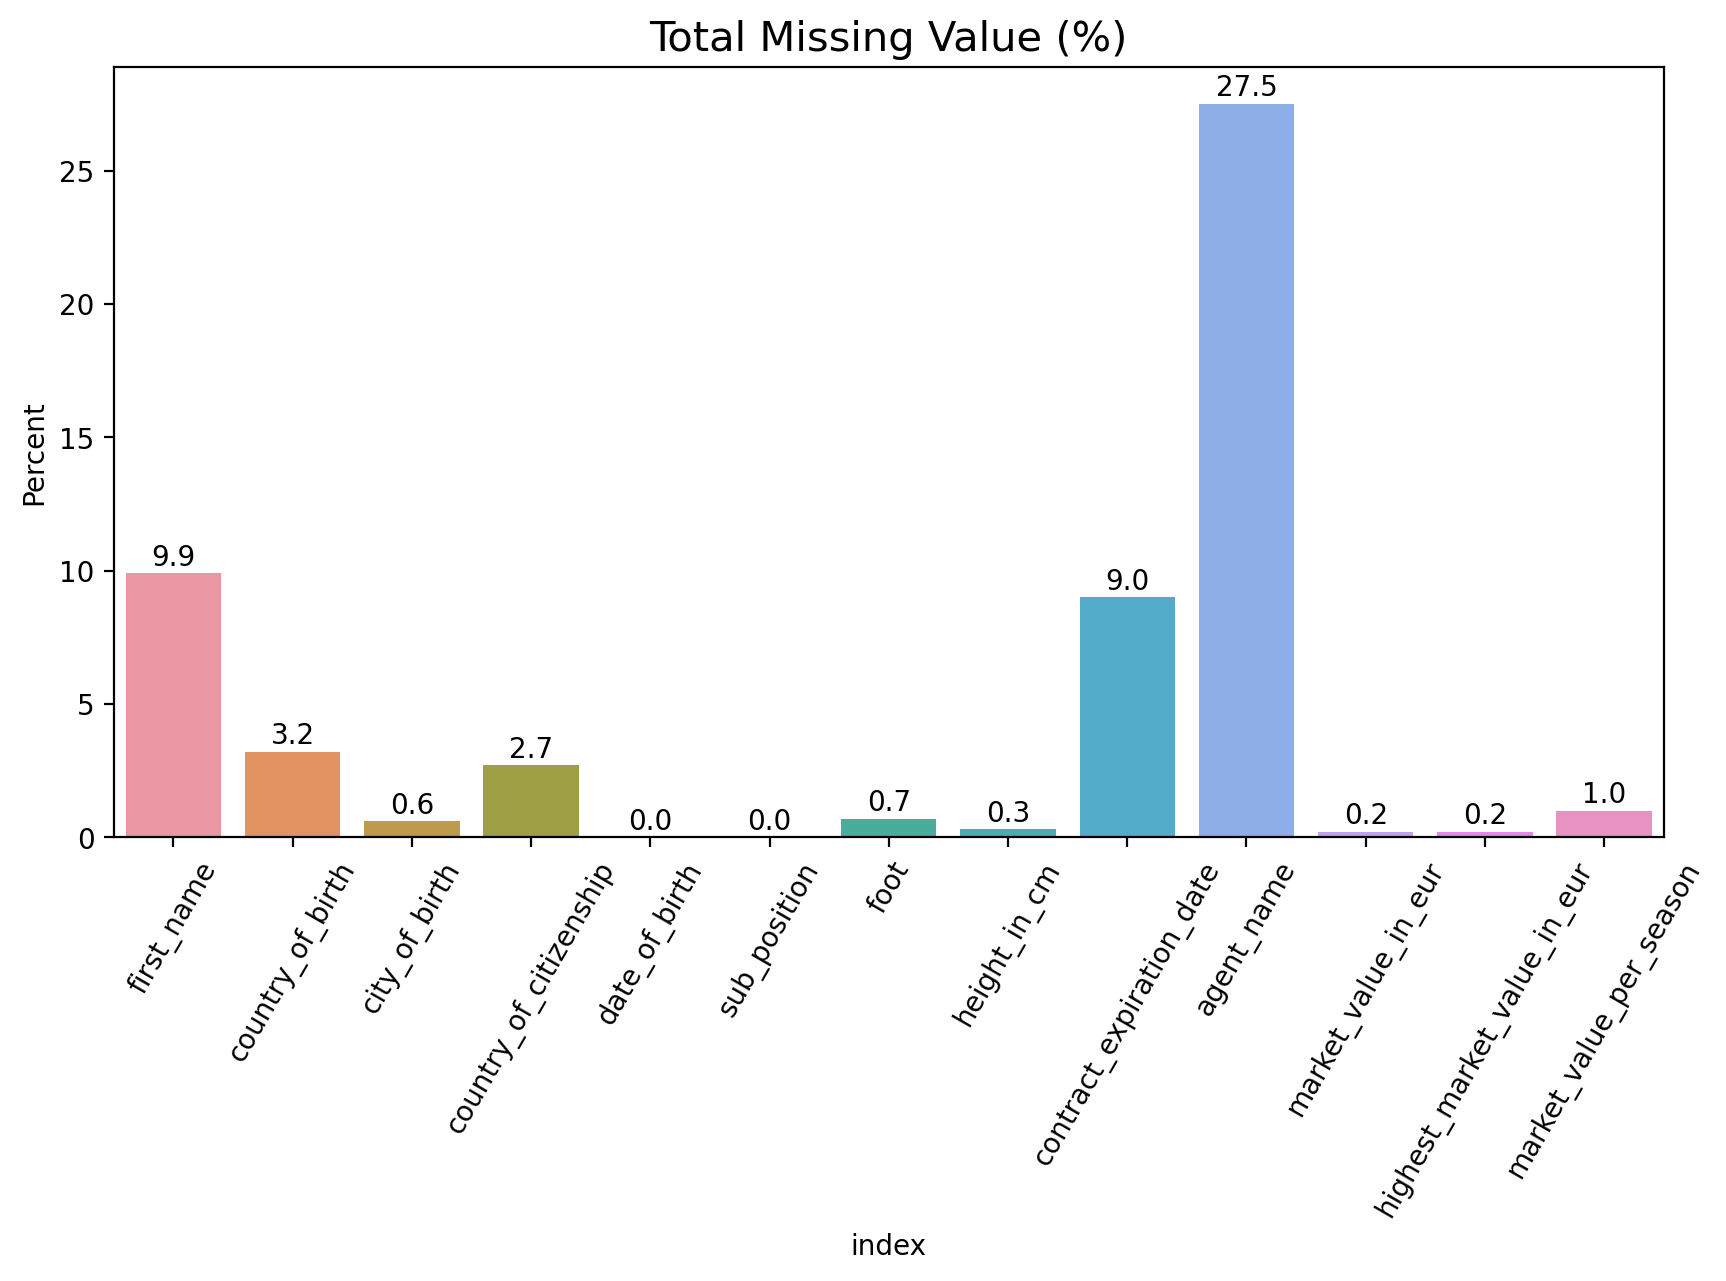

In [30]:
# 결측치 비율 시각화
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing[missing["Total"]!=0].reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=60)

# bar 그래프 상단에 비율 (%) 표기
for bar in sns_pct.patches:
    height = bar.get_height()                   # .get_height() : y좌표

    plt.text(bar.get_x() + bar.get_width()/2,   # 퍼센트 글자 위치
             height+0.3,                        # 퍼센트 글자 높이
             "%.1f" % height,                   # 퍼센트 소수점 지정
             ha="center")                       # 가운데 정렬

# 시각화 제목 이름, 폰트 크기 지정
sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

### `country_of_citizenship` 컬럼 결측치 제거

#### `country_of_citizenship` 컬럼 결측치 
- 결측치 438개 발견

- 결측치 랜덤하게 발생했는지 확인
    - 리그별 선수 국적 결측치 확인
        - 대체로 한쪽에 편중되지 않음, 다른 변수들과 상관 없이 전산 오류 추정 → 완전 무작위 결측 (`MCAR`)       

In [31]:
# 리그별 선수 국적 결측치 확인
df_merged[df_merged.country_of_citizenship.isnull()]["competition_code"].value_counts()

competition_code
liga-portugal-bwin    104
ligue-1                91
serie-a                73
premier-league         71
laliga                 63
bundesliga             39
Name: count, dtype: int64

#### 결측치 제거 함수 생성
- 원본 데이터셋과 동일한 출처 (transfermarkt)에서 가져온 새로운 데이터셋 발견
    - references : https://www.kaggle.com/datasets/mexwell/football-data-from-transfermarkt?select=players.csv
    
- 해당 데이터셋의 `country_of_citizenship` 컬럼과 `merge`하여 결측치 최대한 대체
- 이후에도 채워지지 않은 결측치는 transfermarkt 웹사이트에서 선수 검색하여 직접 대체

In [32]:
def no_null_citizenship_height_foot(df_merged):
    player2_df = pd.read_csv("C:/Users/aryij/Documents/DataStudy/archive(4)/players.csv")
    
    # name 컬럼으로 merge하기 위해, df_merged 데이터프레임의 name_y 컬럼 이름 name으로 변경
    df_merged.rename(columns={"name_y" : "name"}, inplace=True)
    merged = pd.merge(df_merged, player2_df[["name", "country_of_citizenship"]], how="left", on="name")

    # merge된 컬럼 기반하여 원본 컬럼 (country_of_citizenship_x)의 결측치를 country_of_citizenship_y에서 대체
    merged["country_of_citizenship"] = merged["country_of_citizenship_x"].fillna(merged["country_of_citizenship_y"])

    # merge 이후에도 채워지지 않은 결측치는 직접 transfermarkt 웹사이트에서 검색하여 채워준다
    nan_name = ["Brazil", "England", "Argentina", "Australia", "England", "England", "Jamaica", "France", "England",  
                "France", "Italy", "Spain", "Spain", "Spain", "England", "Italy", "Germany", "Spain"]
    
    # 데이터프레임 결측치 채우기 쉽게 하기 위해 merge한 파일의 결측치와 동일한 index로 Series 생성
    nan_names = pd.Series(nan_name, index=merged[merged["country_of_citizenship"].isnull()].index)
    # 결측치 index, column 정보 nan_search에 선언
    nan_search = merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"
    
    # 결측치 대체
    # merged.loc[merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"] = merged.loc[merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"].fillna(nan_names)
    merged.loc[nan_search] = merged.loc[nan_search].fillna(nan_names)

    merged2 = pd.merge(merged, player2_df[["player_id", "foot", "height_in_cm"]], on="player_id", how="left")
    merged2["foot"] = merged2["foot_x"].fillna(merged2["foot_y"])
    merged2["height_in_cm"] = merged2["height_in_cm_x"].fillna(merged2["height_in_cm_y"])




    drop_cols = ['player_club_id', 'player_id', 'player_current_club_id', 'competition_id', 'name_x', 'sub_type', 'type', 'country_id', 'country_name', 
             'domestic_league_code', 'confederation', 'first_name', 'last_name', 'name', 'current_club_id', 'player_code', 
             'country_of_birth', 'city_of_birth', 'country_of_citizenship_x', 'position', 'contract_expiration_date', 'agent_name', 
             'current_club_domestic_competition_id','market_value_in_eur', 'country_of_citizenship_y', 'height_in_cm_x', 'height_in_cm_y', 'foot_x', 'foot_y']
    
    merged2.drop(columns=drop_cols, inplace=True)

    return merged2   

In [33]:
merged_again = no_null_citizenship_height_foot(df_merged)
merged_again

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/aryij/Documents/DataStudy/archive(4)/players.csv'

In [ ]:
merged_again[merged_again.player_name=="Aaron Cresswell"]

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,5000000.0,England,left,170.0
5,Aaron Cresswell,2021,3,0,2,3,2728,31,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,3000000.0,England,left,170.0
6,Aaron Cresswell,2022,2,0,0,1,2237,28,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,1200000.0,England,left,170.0
7,Aaron Cresswell,2023,1,0,0,0,235,5,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,900000.0,England,left,170.0


In [ ]:
# 함수 적용 후 결측치 대체된 것 확인
merged_again.isnull().sum()

player_name                      0
last_season                      0
yellow_cards                     0
red_cards                        0
goals                            0
assists                          0
minutes_played                   0
total_apps                       0
competition_code                 0
date_of_birth                    1
sub_position                     3
current_club_name                0
highest_market_value_in_eur     34
market_value_per_season        189
country_of_citizenship           0
foot                           116
height_in_cm                    53
dtype: int64

In [ ]:
merged_again.to_csv("data/merged_again.csv", index=False)

##### 결측치 비율 시각화

In [ ]:
# 결측치 비율 구함
null_total = merged_again.isnull().sum()
null_count = merged_again.isnull().count()
null_pct = round((null_total/null_count)*100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing = pd.concat([null_total, null_pct], axis=1, keys=["Total", "Percent"])
missing

,Total,Percent
player_name,0,0.0
last_season,0,0.0
yellow_cards,0,0.0
red_cards,0,0.0
goals,0,0.0
assists,0,0.0
minutes_played,0,0.0
total_apps,0,0.0
competition_code,0,0.0
date_of_birth,1,0.0


##### `barplot` 사용하여 결측치 비율 시각화

C:\Users\aryij\AppData\Local\Temp\ipykernel_17740\2634293483.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=60)


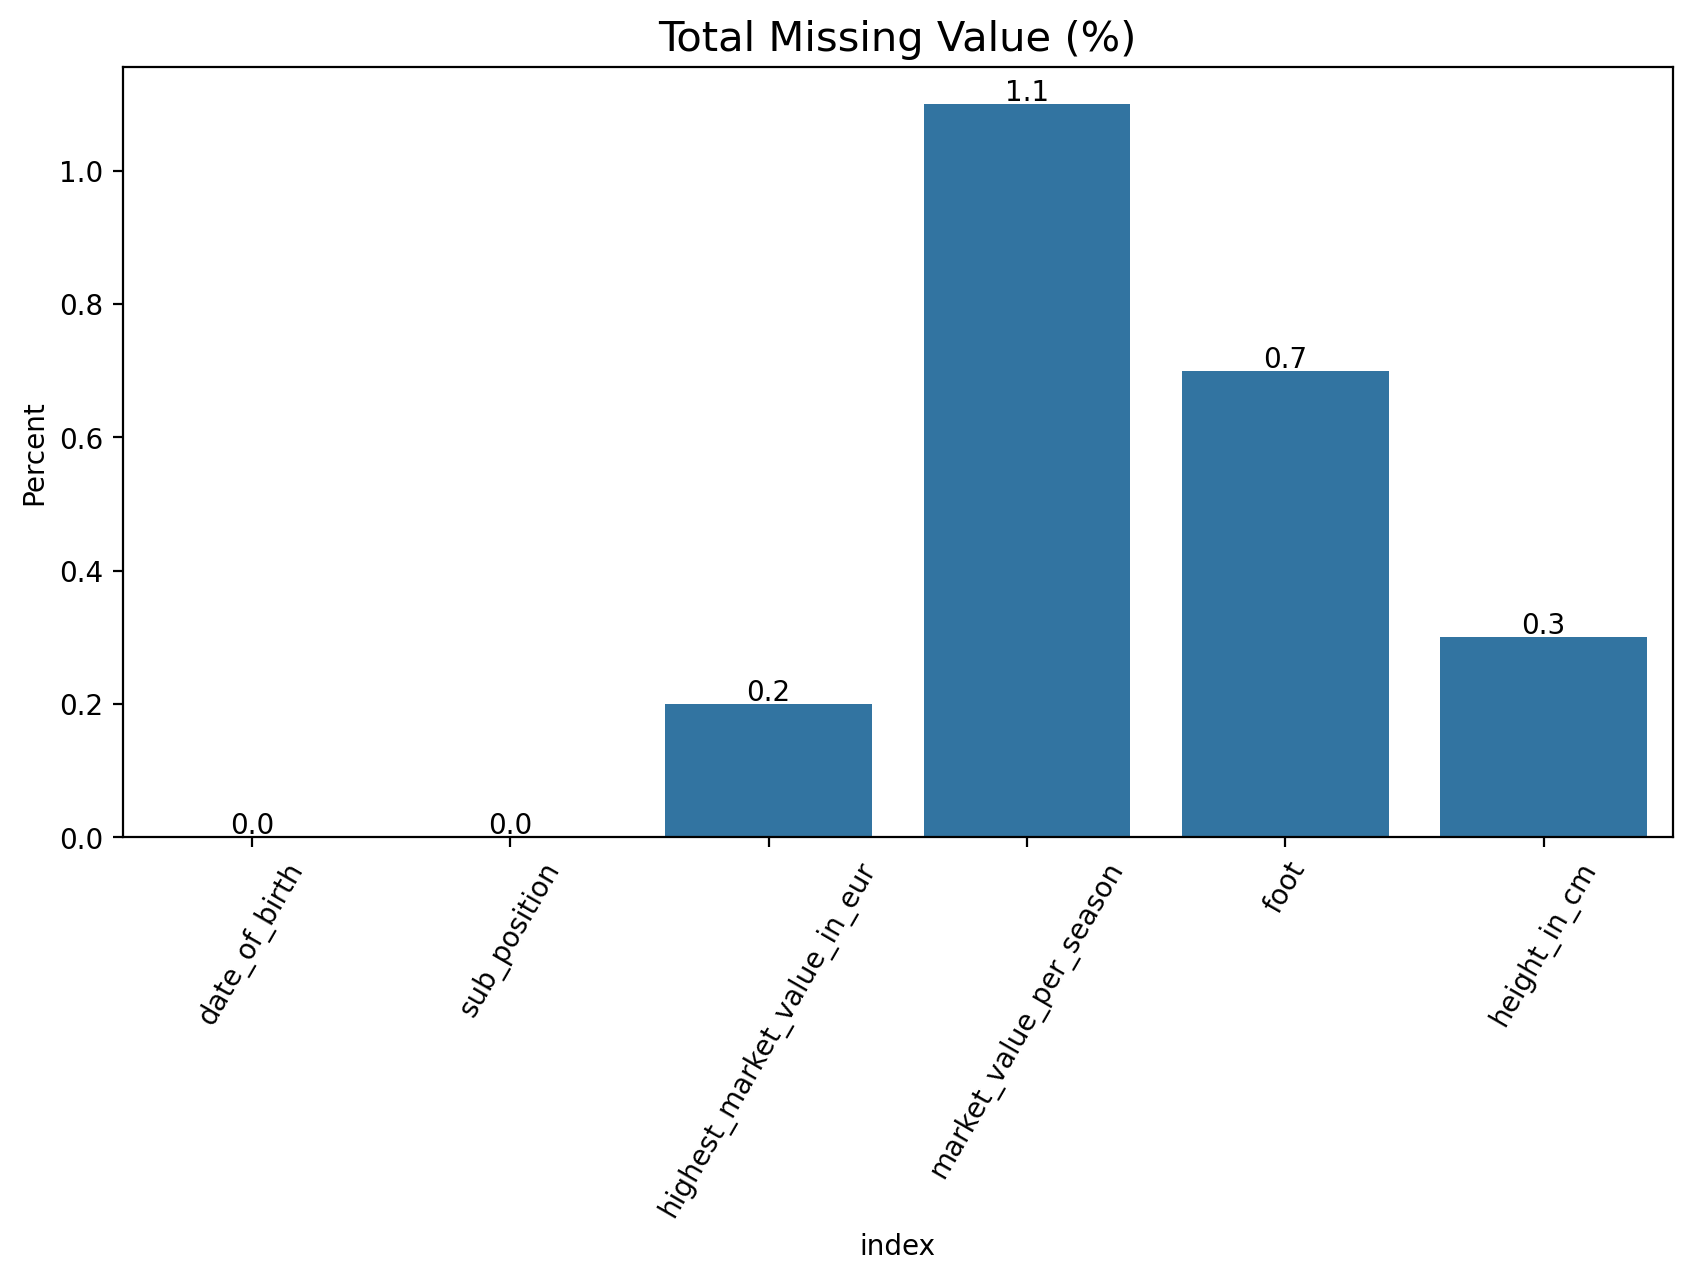

In [ ]:
# 결측치 비율 시각화
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing[missing["Total"]!=0].reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=60)

# bar 그래프 상단에 비율 (%) 표기
for bar in sns_pct.patches:
    height = bar.get_height()                   # .get_height() : y좌표

    plt.text(bar.get_x() + bar.get_width()/2,   # 퍼센트 글자 위치
             height+0.005,                        # 퍼센트 글자 높이
             "%.1f" % height,                   # 퍼센트 소수점 지정
             ha="center")                       # 가운데 정렬

# 시각화 제목 이름, 폰트 크기 지정
sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

#### 결측치 제거
- 결측치 처리 방법
    - 결측치 비율 `10% 미만` : 제거 또는 대체
    - 결측치 비율 `10% 이상 20% 미만` : 모델 기반 처리
    - 결측치 비율 `20% 이상` : 모델 기반 처리

- 결측치 대체로 `1%` 미만 → 제거 

In [ ]:
# 결측치 처리 전과 처리 후 비교
print("결측치 drop 전 데이터프레임 row 수 :", merged_again.shape[0])
print("결측치 drop 후 데이터프레임 row 수 :", merged_again.dropna().shape[0])
print("결측치 drop 비율", round((merged_again.shape[0]-merged_again.dropna().shape[0])/merged_again.shape[0], 2), "%")

결측치 drop 전 데이터프레임 row 수 : 17635
결측치 drop 후 데이터프레임 row 수 : 17328
결측치 drop 비율 0.02 %


In [ ]:
df_dropped = merged_again.dropna()

In [ ]:
df_dropped.head()

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,5000000.0,England,left,170.0


In [ ]:
df_dropped.rename(columns={"last_season" : "start_season", 
                          "highest_market_value_in_eur" : "highest_market_value",
                          "sub_position" : "position", 
                          "country_of_citizenship" : "country"}, inplace=True)

C:\Users\aryij\AppData\Local\Temp\ipykernel_17740\2726463645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.rename(columns={"last_season" : "start_season",


In [ ]:
# df_dropped reset_index 시행
df_dropped.reset_index(drop=True, inplace=True)

In [ ]:
# 중복 확인
df_dropped[df_dropped.duplicated()]

,player_name,start_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,date_of_birth,position,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm
23,Aaron Ramsey,2019,2,0,3,1,1011,23,serie-a,1990-12-26,Central Midfield,Olympique Gymnaste Club Nice Côte d'Azur,45000000.0,28000000.0,Wales,right,178.0
25,Aaron Ramsey,2020,2,0,2,5,1132,23,serie-a,1990-12-26,Central Midfield,Olympique Gymnaste Club Nice Côte d'Azur,45000000.0,14000000.0,Wales,right,178.0
27,Aaron Ramsey,2021,0,0,0,0,98,3,serie-a,1990-12-26,Central Midfield,Olympique Gymnaste Club Nice Côte d'Azur,45000000.0,3000000.0,Wales,right,178.0
29,Aaron Ramsey,2022,3,0,1,2,1588,27,ligue-1,1990-12-26,Central Midfield,Olympique Gymnaste Club Nice Côte d'Azur,45000000.0,2500000.0,Wales,right,178.0
31,Aaron Ramsey,2023,1,0,0,0,526,14,premier-league,2003-01-21,Attacking Midfield,Burnley Football Club,15000000.0,15000000.0,England,right,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17193,Álvaro González,2019,4,1,0,0,1629,20,ligue-1,1990-01-08,Centre-Back,Olympique de Marseille,9000000.0,6500000.0,Spain,right,182.0
17195,Álvaro González,2020,14,0,2,3,2834,32,ligue-1,1990-01-08,Centre-Back,Olympique de Marseille,9000000.0,7000000.0,Spain,right,182.0
17197,Álvaro González,2021,1,0,0,0,451,6,ligue-1,1990-01-08,Centre-Back,Olympique de Marseille,9000000.0,2500000.0,Spain,right,182.0
17285,Óscar Gil,2021,7,0,0,2,1697,22,laliga,1998-04-26,Right-Back,RCD Espanyol Barcelona,3000000.0,3000000.0,Spain,both,175.0


In [ ]:
# 중복 제거
df_dropped = df_dropped.drop_duplicates()
df_dropped.reset_index(drop=True, inplace=True)

In [ ]:
df_dropped

,player_name,start_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,date_of_birth,position,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,5000000.0,England,left,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,İlkay Gündoğan,2019,7,0,2,1,2017,31,premier-league,1990-10-24,Central Midfield,Futbol Club Barcelona,50000000.0,40000000.0,Germany,right,180.0
15997,İlkay Gündoğan,2020,1,0,13,3,2031,28,premier-league,1990-10-24,Central Midfield,Futbol Club Barcelona,50000000.0,40000000.0,Germany,right,180.0
15998,İlkay Gündoğan,2021,1,0,8,3,1855,27,premier-league,1990-10-24,Central Midfield,Futbol Club Barcelona,50000000.0,25000000.0,Germany,right,180.0
15999,İlkay Gündoğan,2022,0,0,8,5,2359,31,premier-league,1990-10-24,Central Midfield,Futbol Club Barcelona,50000000.0,20000000.0,Germany,right,180.0


## 전처리 끝낸 파일 `csv`로 저장

In [ ]:
df_dropped.to_csv("data/df_preprocessed.csv", index=False)